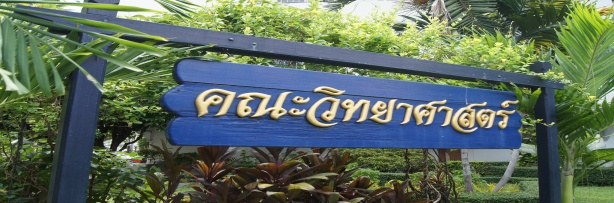

### <span style='color:lightgreen;'>The Otsu Algorithm</span>
**<span style='color:lightgreen;'>The Otsu algorithm</span>** is an automatic thresholding technique used in image processing to separate the foreground from the background. It calculates the optimum threshold value by minimizing the intra-class variance (the variance within the foreground and the background). In other words, it finds a threshold that makes the foreground and background pixels as distinct as possible.

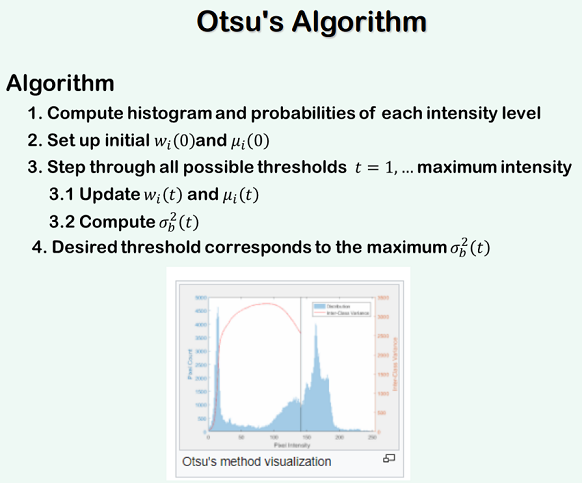


Here's a more detailed explanation:




#### <span style='color:lightblue;'></span>Step-by-Step Tutorial for Otsu Thresholding</span>  
1. **<span style='color:lightgreen;'>Import Libraries and define functions</span>**
    - Import the necessary libraries and define custom function.

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
def ShowImage(img):
    plt.axis("off")
    plt.imshow(img, cmap='gray')
    plt.show()

In [3]:
def histogram(img):
    row, col = img.shape
    hist = [0.0] * 256
    for i in range(row):
        for j in range(col):
            hist[img[i, j]]+=1
    return np.array(hist)

In [4]:
def ResizeImage(img, scale):
    row, col = img.shape
    dim = (int(col*scale), int(row*scale))
    return cv2.resize(img, dim, interpolation = cv2.INTER_AREA)

2. **<span style='color:lightgreen;'>Read an Image</span>**
    - Load and resize an image using OpenCV.

In [5]:
img = cv2.imread('./images/bank4.jpg', 0)
print(img.shape)

(514, 1200)


In [ ]:
img = ResizeImage(img, 0.5)
print(img.shape)

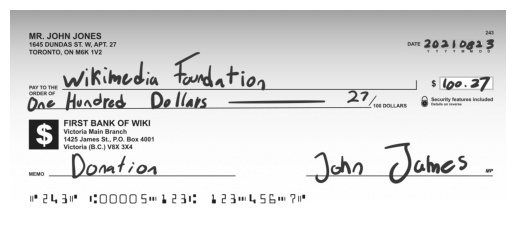

In [6]:
ShowImage(img)

3. **<span style='color:lightgreen;'>Calculate Histogram</span>**
    - A histogram shows the distribution of pixel intensities (0–255) in the image. For each intensity level, the histogram will give you the number of pixels having that particular intensity.

In [ ]:
hist = histogram(img)

4. **<span style='color:lightgreen;'>Plot Histogram</span>**
    - Use Matplotlib to display the histogram.

In [ ]:
plt.figure(figsize=(4,2))
plt.plot(hist)
plt.title('Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()
# plt.savefig('histogram.png')

 - **<span style='color:lightgreen;'>Calculate Probability of Histogram:</span>** 
 The probability of each intensity level is the number of pixels at that intensity divided by the total number of pixels. 

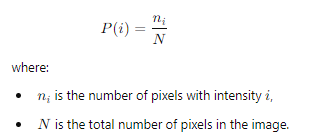



In [ ]:
prob = hist/np.sum(hist)

 - **<span style='color:lightgreen;'>Split Histogram into 2 Classes and Calculate the Class Probabilities:</span>**
 Class probabilities are calculated for two groups: one representing pixels below the threshold and one representing pixels above the threshold. For a given threshold 𝑡.

 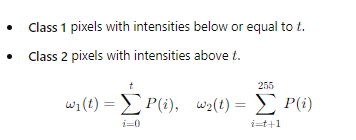


In [ ]:
thresh = 10

In [ ]:
w0 = np.sum(prob[:thresh]) + 0.00000001
w1 = np.sum(prob[thresh:]) + 0.00000001

 - **<span style='color:lightgreen;'>Calculate Mean values of each Group based on Histogram:</span>**
 For each class, you calculate the mean of the pixel intensities.

 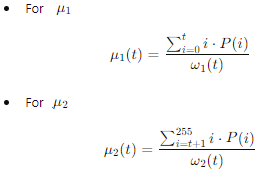

In [ ]:
u0 = np.sum(np.array([i for i in range(thresh)])*prob[:thresh])/w0
u1 = np.sum(np.array([i for i in range(thresh,256)])*prob[thresh:])/w1

 - **<span style='color:lightgreen;'>Calculate the Inter-Class Variance:</span>**
 Inter-class variance measures the spread within each class (foreground and background). It is calculated as:

 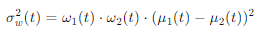

In [ ]:
v_btw = (w0*w1)*np.power(u0-u1,2)
print(v_btw)

 - **<span style='color:lightgreen;'>Select the Threshold That Maximizes the Inter-Class Variance:</span>**
 The goal of the Otsu algorithm is to maximize the inter-class variance. Therefore, compute the variance for each possible threshold <i>𝑡</i> and the optimal threshold will be the one that maximizes <i>𝜎_btw</i>

 - **<span style='color:lightgreen;'>Apply the Threshold to Segment the Image:</span>**
 Once the optimal threshold is found, apply it to the image by setting all pixel values below the threshold to 0 (background) and all pixel values above the threshold to 255 (foreground).

In [7]:
def otsu(hist):
    tot = np.sum(hist)
    prob = hist/tot
    coef_max = -1
    thr = -1
    for t in range(1,256):
        w0 = np.sum(prob[:t]) + 0.00000001
        w1 = np.sum(prob[t:]) + 0.00000001
        i0 = np.array([i for i in range(t)])
        i1 = np.array([i for i in range(t,256)])
        u0 = np.sum(i0*prob[:t])/w0
        u1 = np.sum(i1*prob[t:])/w1

        coef = (w0*w1)*np.power(u0-u1,2)
        if  coef > coef_max:
            coef_max = coef
            thr = t
    return thr

 - **<span style='color:lightgreen;'>Main Process</span>**

(514, 1200)


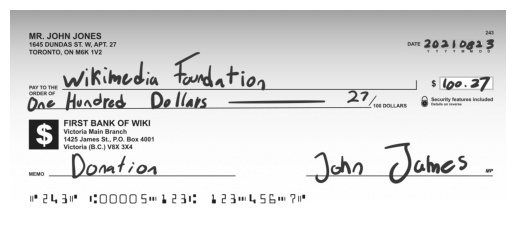

In [8]:
img = cv2.imread("./images/bank4.jpg", cv2.IMREAD_GRAYSCALE)
print(img.shape)
ShowImage(img)

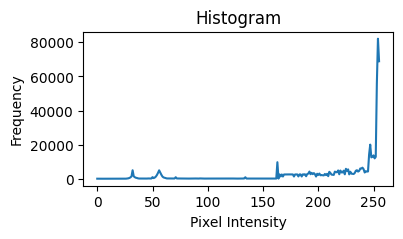

In [9]:
hist = histogram(img)
plt.figure(figsize=(4,2))
plt.plot(hist)
plt.title('Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()

In [10]:
thr = otsu(hist)
print(thr)


147


 - **<span style='color:lightgreen;'>Theshold Step by Method 1</span>**

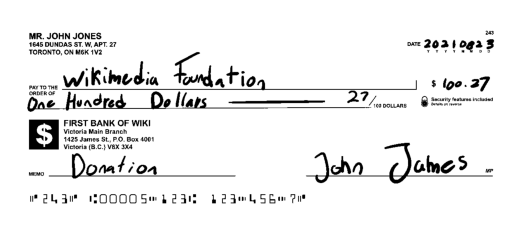

In [11]:
out = np.zeros_like(img)
thresh = thr
out[img >= thresh] = 255
out = out.astype(np.uint8)
ShowImage(out)

 - **<span style='color:lightgreen;'>Theshold Step by Method 2</span>**

In [ ]:
ret, out2 = cv2.threshold(img, thresh, 255, cv2.THRESH_BINARY)
ShowImage(out2)